In [6]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [7]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [8]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [9]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [10]:



df = getQuotes(frameM30, 2023)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0
...,...,...,...,...,...,...,...,...
10112,1698076800,1.06094,1.06128,1.05984,1.06004,3837,9,0
10113,1698078600,1.06004,1.06056,1.05907,1.06048,5901,9,0
10114,1698080400,1.06049,1.06316,1.06044,1.06260,6956,9,0
10115,1698082200,1.06260,1.06299,1.06173,1.06283,6257,9,0


In [11]:



def trendIntensityIndex(df, lookup = 10):
    df[f'sma_{lookup}'] = ta.sma(df['close'], length=lookup)
    df[f'col1_{lookup}'] = np.where((df['close'] > df[f'sma_{lookup}']), (df['close'] - df[f'sma_{lookup}']), 0)
    df[f'col2_{lookup}'] = np.where((df['close'] < df[f'sma_{lookup}']), (df[f'sma_{lookup}'] - df['close']), 0)
    df[f'rollingTotalUp_{lookup}'] = df[f'col1_{lookup}'].rolling(window=lookup).sum()
    df[f'rollingTotalDown_{lookup}'] = df[f'col2_{lookup}'].rolling(window=lookup).sum()
    df[f'tii_{lookup}'] = ((df[f'rollingTotalUp_{lookup}']) / (df[f'rollingTotalUp_{lookup}'] + df[f'rollingTotalDown_{lookup}'])) * 100
    return df




In [12]:


tiishort=14
tiithresholdlong=60
tiithresholdshort=40
smalength=100

df = trendIntensityIndex(df, tiishort)
df[f'sma_{smalength}'] = ta.sma(close=df['close'], length=smalength)

df = df.dropna()

df



,time,open,high,low,close,tick_volume,spread,real_volume,sma_14,col1_14,col2_14,rollingTotalUp_14,rollingTotalDown_14,tii_14,sma_100
99,1672795800,1.05444,1.05476,1.05415,1.05453,2843,7,0,1.055204,0.000000,0.000674,0.001531,0.006154,19.925651,1.063524
100,1672797600,1.05453,1.05573,1.05450,1.05555,3323,7,0,1.055230,0.000320,0.000000,0.001722,0.006154,21.864514,1.063386
101,1672799400,1.05556,1.05609,1.05555,1.05578,2191,7,0,1.055315,0.000465,0.000000,0.002187,0.005575,28.177050,1.063254
102,1672801200,1.05578,1.05652,1.05568,1.05614,2894,7,0,1.055354,0.000786,0.000000,0.002764,0.005575,33.147752,1.063119
103,1672803000,1.05614,1.05692,1.05604,1.05664,3642,7,0,1.055427,0.001213,0.000000,0.003939,0.005575,41.403904,1.062983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10112,1698076800,1.06094,1.06128,1.05984,1.06004,3837,9,0,1.060071,0.000000,0.000031,0.017857,0.000031,99.824309,1.058445
10113,1698078600,1.06004,1.06056,1.05907,1.06048,5901,9,0,1.060234,0.000246,0.000000,0.017782,0.000031,99.823570,1.058492
10114,1698080400,1.06049,1.06316,1.06044,1.06260,6956,9,0,1.060528,0.002072,0.000000,0.019244,0.000031,99.836946,1.058552
10115,1698082200,1.06260,1.06299,1.06173,1.06283,6257,9,0,1.060751,0.002079,0.000000,0.019566,0.000031,99.839633,1.058605


In [13]:



buyIndices=[]
sellIndices=[]

buys=[]
sells=[]

position = None

sl = 0.5 / 100
tp = 2.0 / 100

slamount = None
tpamount = None

for i in range(len(df)):
    if (i > 0) and (position is None) and (df.iloc[i][f'tii_{tiishort}'] > tiithresholdlong) and (df.iloc[i - 1][f'tii_{tiishort}'] < tiithresholdlong) and (df.iloc[i]['close'] > df.iloc[i][f'sma_{smalength}']):
        buyIndices.append(i)
        buys.append(df.iloc[i]['close'])
        position = 'long'
        slamount = df.iloc[i]['close'] - (sl * df.iloc[i]['close'])
        tpamount = df.iloc[i]['close'] + (tp * df.iloc[i]['close'])
    if (i > 0) and (position == 'long') and (
        (
            (df.iloc[i][f'tii_{tiishort}'] < tiithresholdshort) and
            (df.iloc[i - 1][f'tii_{tiishort}'] > tiithresholdshort) and
            (df.iloc[i]['close'] < df.iloc[i][f'sma_{smalength}'])
        ) or (
         #   (df.iloc[i]['close'] <= slamount)
        ) or (
            (df.iloc[i]['close'] >= tpamount)
        )
    ):
        sellIndices.append(i)
        sells.append(df.iloc[i]['close'])
        position = None
        slamount = None
        tpamount = None





In [14]:

print(buys)
print(sells)

print(buyIndices)
print(sellIndices)


[1.0623, 1.06013, 1.08323, 1.08524, 1.08428, 1.08314, 1.08788, 1.08989, 1.09016, 1.08597, 1.08771, 1.07314, 1.07374, 1.06765, 1.06158, 1.06264, 1.06213, 1.06724, 1.08606, 1.08624, 1.09157, 1.09731, 1.09564, 1.09648, 1.09877, 1.10325, 1.10245, 1.09984, 1.08881, 1.08139, 1.07302, 1.07356, 1.07057, 1.0715, 1.07091, 1.07613, 1.0806499999999999, 1.09327, 1.10067, 1.09202, 1.09233, 1.08872, 1.12339, 1.10961, 1.10372, 1.10206, 1.09748, 1.09857, 1.08906, 1.0881, 1.08136, 1.0719, 1.07442, 1.06747, 1.05892, 1.04854, 1.05748]
[1.05519, 1.08275, 1.08161, 1.07878, 1.07957, 1.08664, 1.08708, 1.08659, 1.08573, 1.08535, 1.0842, 1.07352, 1.07187, 1.06479, 1.05972, 1.05412, 1.06775, 1.08916, 1.08325, 1.09154, 1.09533, 1.09516, 1.09513, 1.09599, 1.10132, 1.10103, 1.09659, 1.10209, 1.08642, 1.0804, 1.07148, 1.06981, 1.06919, 1.06933, 1.0744, 1.07757, 1.09134, 1.0901, 1.08917, 1.093, 1.08636, 1.112, 1.12313, 1.09929, 1.09812, 1.0984, 1.09729, 1.09643, 1.08671, 1.08832, 1.08079, 1.07308, 1.07347, 1.06598, 1

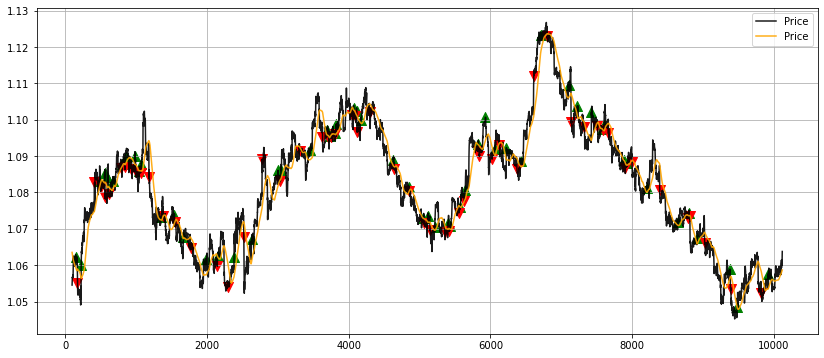

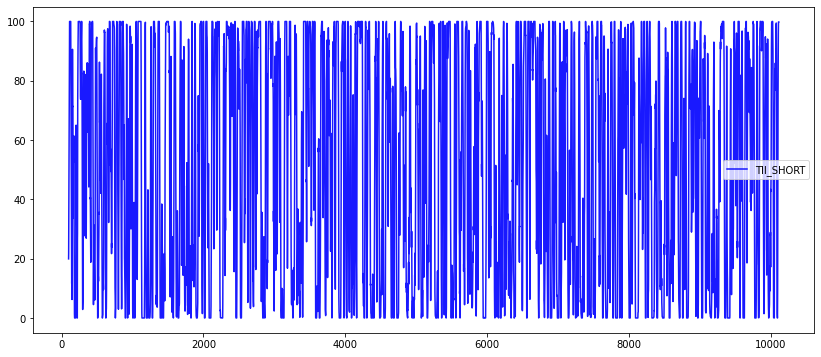

In [15]:


plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.plot(df[f'sma_{smalength}'], label='Price', color='orange', alpha=0.9)
plt.scatter(df.iloc[buyIndices].index, df.iloc[buyIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellIndices].index, df.iloc[sellIndices]['close'], marker = 'v', color = 'r', s = 100)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize = (14, 6))
plt.plot(df[f'tii_{tiishort}'], label='TII_SHORT', c='blue', alpha=0.9)
plt.legend()
plt.show()



In [19]:




brokerage = 1 / 100

wins = 0
losses = 0

profit = 0
loss = 0

averageprofit = 0
averageloss = 0

netresult = ''

for i in range(len(sells)):
    maximum = max(sells[i], buys[i])
    brokerageAmount = brokerage * maximum
    diff = sells[i] - buys[i] - brokerageAmount
    if (diff > 0):
        wins += 1
        profit += diff
    if (diff < 0):
        losses += 1
        loss += abs(diff)

if (profit > loss):
    netresult = 'Win'
elif (profit == loss):
    netresult = 'None'
else:
    netresult = 'Loss'

if profit and wins:
    averageprofit = profit / wins

if loss and losses:
    averageloss = loss / losses

hitratio = (wins / (wins + losses)) * 100
profitfactor = (profit / loss)
expectancy = (averageprofit * hitratio) - (averageloss * (1 - hitratio))
riskreward = (averageprofit / averageloss)

print(f'''
    Net result = {netresult}
    Hit ratio = {hitratio} %
    Profit factor = {profitfactor} {{currency}}
    Expectancy = {expectancy} {{currency}}
    Realised risk reward ratio = {riskreward} {{currency}}
''')







    Net result = Loss
    Hit ratio = 5.357142857142857 %
    Profit factor = 0.053202169582799844 {currency}
    Expectancy = 0.11651985902965001 {currency}
    Realised risk reward ratio = 0.9399049959627971 {currency}

